# Scraping Met Musem
Mariam Barakat

In [45]:
import pandas as pd 
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import os
import json

### Combine all the json

In [46]:
import os
import json

# Specify the directory where your JSON files are located
json_files_directory = 'data'

# Specify the name of the output combined JSON file
output_json_file = 'combined_met.json'

# Function to normalize text
def normalize_text(text):
    try:
        # Attempt to replace en dashes with hyphens
        normalized_text = text.replace('–', '-')
    except Exception as e:
        print(f"An error occurred while normalizing text: {e}")
        normalized_text = text  # If an error occurs, keep the original text
    return normalized_text

# Initialize an empty list to store the combined and normalized data
combined_normalized_data = []

# Iterate over each JSON file in the directory
for filename in os.listdir(json_files_directory):
    if filename.endswith('.json'):
        # Construct the full path to the JSON file
        file_path = os.path.join(json_files_directory, filename)
        
        # Load the data from the current JSON file
        with open(file_path, 'r', encoding='utf-8') as file:
            data = json.load(file)
            
            # Normalize all text fields
            for key, value in data.items():
                if isinstance(value, str):
                    data[key] = normalize_text(value)

            # Add a "Path" key with the file name to each dictionary
            data['Path'] = filename
            
            # Append the data from the current file to the combined_normalized_data list
            combined_normalized_data.append(data)

# Write the combined and normalized data to the output JSON file
with open(output_json_file, 'w', encoding='utf-8') as output_file:
    json.dump(combined_normalized_data, output_file, indent=2, ensure_ascii=False)

print(f'Combined and normalized data with "Path" key written to {output_json_file}')


Combined and normalized data with "Path" key written to combined_met.json


### Normalize the json file

In [47]:
import json
import pandas as pd
data = json.load(open('combined_met.json',encoding="utf8"))

In [48]:
# Load your JSON file
input_json_file = 'combined_met.json'

with open(input_json_file, 'r') as file:
    data = json.load(file)

# Find all unique keys in the list of dictionaries
all_keys = set()
for item in data:
    all_keys.update(item.keys())

# Convert the set of keys to a list if needed
all_keys_list = list(all_keys)

# Print or use the list of keys
print("All keys available in the JSON file:")
print(all_keys_list)


All keys available in the JSON file:
['artistWikidata_URL', 'objectDate', 'isHighlight', 'locus', 'city', 'metadataDate', 'accessionNumber', 'country', 'state', 'geographyType', 'portfolio', 'objectEndDate', 'additionalImages', 'isPublicDomain', 'excavation', 'isTimelineWork', 'accessionYear', 'culture', 'artistDisplayBio', 'department', 'artistEndDate', 'artistULAN_URL', 'primaryImage', 'objectName', 'artistDisplayName', 'artistGender', 'repository', 'artistRole', 'subregion', 'county', 'objectURL', 'period', 'Path', 'dimensions', 'creditLine', 'title', 'tags', 'artistSuffix', 'rightsAndReproduction', 'dynasty', 'locale', 'linkResource', 'measurements', 'reign', 'artistNationality', 'artistBeginDate', 'objectWikidata_URL', 'classification', 'GalleryNumber', 'primaryImageSmall', 'constituents', 'artistPrefix', 'medium', 'river', 'objectBeginDate', 'artistAlphaSort', 'region', 'objectID']


In [49]:
print(len(all_keys_list))

58


In [50]:
# Load your JSON file
input_json_file = 'combined_met.json'
output_json_file = 'combined_met.json'

with open(input_json_file, 'r') as file:
    data = json.load(file)

# Find all unique keys in the list of dictionaries
all_keys = set()
for item in data:
    all_keys.update(item.keys())

# Normalize the list of dictionaries
normalized_data = []
for item in data:
    normalized_item = {key: item.get(key, '') for key in all_keys}
    normalized_data.append(normalized_item)

# Write the normalized data to a new JSON file
with open(output_json_file, 'w') as output_file:
    json.dump(normalized_data, output_file, indent=2)

print(f'Normalized data written to {output_json_file}')

Normalized data written to combined_met.json


### Converting to dataframe

In [51]:
import json
import pandas as pd
data = json.load(open('combined_met.json',encoding="utf8"))

In [52]:
df = pd.DataFrame(data)

In [53]:
df

,artistWikidata_URL,objectDate,isHighlight,locus,city,metadataDate,accessionNumber,country,state,geographyType,...,GalleryNumber,primaryImageSmall,constituents,artistPrefix,medium,river,objectBeginDate,artistAlphaSort,region,objectID
0,,664-30 B.C.,False,,,2021-07-17T04:40:49.67Z,2021.41.1,Egypt,,From,...,,https://images.metmuseum.org/CRDImages/eg/web-...,None,,Cupreous metal,,-664,,,329767
1,,ca. 1850-1650 B.C.,False,,,2023-02-07T04:46:51.34Z,2021.41.2,Egypt,,From,...,106,https://images.metmuseum.org/CRDImages/eg/web-...,None,,Granite (?),,-1850,,,329768
2,,ca. 664-525 B.C.,False,,,2023-02-07T04:46:51.34Z,2021.41.3,Egypt,,From,...,130,https://images.metmuseum.org/CRDImages/eg/web-...,None,,Graywacke (?),,-664,,,329769
3,,664-30 B.C.,False,,,2021-07-17T04:40:49.67Z,2021.41.5,Egypt,,From,...,,https://images.metmuseum.org/CRDImages/eg/web-...,None,,Cupreous metal,,-664,,,329771
4,,ca. 1850-1650 B.C.,False,,,2023-02-07T04:46:51.34Z,2021.41.7,Egypt,,From,...,106,https://images.metmuseum.org/CRDImages/eg/web-...,None,,Steatite or serpentinite,,-1850,,,329774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15163,,19th century,False,,,2023-06-27T04:56:44.237Z,C.I.51.112.11,Egypt,,Made in,...,,https://images.metmuseum.org/CRDImages/is/web-...,None,,"Cotton, metal wrapped thread; embroidered",,1800,,,85658
15164,,19th century,False,,,2023-06-29T04:56:37.033Z,C.I.56.6.11,Egypt,,Made in,...,,https://images.metmuseum.org/CRDImages/is/web-...,None,,"Cotton, metal wrapped thread; embroidered",,1800,,,85659
15165,,664-30 B.C.,False,,,2023-07-26T04:54:41.623Z,2022.420,Egypt,,From,...,,https://images.metmuseum.org/CRDImages/eg/web-...,None,,Bronze or cupreous alloy,,-664,,,857670
15166,,ca. 1550-1295 B.C.,False,,,2023-11-22T04:56:59.923Z,12.181.296a-d-anc1,Egypt,,From,...,,https://images.metmuseum.org/CRDImages/eg/web-...,None,,Gold leaf,,-1550,,"Upper Egypt, Thebes",905798


#### Explore null

In [54]:
empty_string_percentage = ((df == '').sum() / len(df)) * 100
print(empty_string_percentage )

artistWikidata_URL        98.536392
objectDate                 0.046150
isHighlight                0.000000
locus                     68.150053
city                      95.365243
metadataDate               0.000000
accessionNumber            0.000000
country                    0.000000
state                    100.000000
geographyType              0.000000
portfolio                100.000000
objectEndDate              0.000000
additionalImages           0.000000
isPublicDomain             0.000000
excavation                47.409019
isTimelineWork             0.000000
accessionYear              1.127373
culture                  100.000000
artistDisplayBio          98.931962
department                 0.000000
artistEndDate             98.595728
artistULAN_URL            98.536392
primaryImage               0.000000
objectName                 0.171414
artistDisplayName         98.206751
artistGender              99.287975
repository                 0.000000
artistRole                98

#### Drop useless

In [55]:
df.columns

Index(['artistWikidata_URL', 'objectDate', 'isHighlight', 'locus', 'city',
       'metadataDate', 'accessionNumber', 'country', 'state', 'geographyType',
       'portfolio', 'objectEndDate', 'additionalImages', 'isPublicDomain',
       'excavation', 'isTimelineWork', 'accessionYear', 'culture',
       'artistDisplayBio', 'department', 'artistEndDate', 'artistULAN_URL',
       'primaryImage', 'objectName', 'artistDisplayName', 'artistGender',
       'repository', 'artistRole', 'subregion', 'county', 'objectURL',
       'period', 'Path', 'dimensions', 'creditLine', 'title', 'tags',
       'artistSuffix', 'rightsAndReproduction', 'dynasty', 'locale',
       'linkResource', 'measurements', 'reign', 'artistNationality',
       'artistBeginDate', 'objectWikidata_URL', 'classification',
       'GalleryNumber', 'primaryImageSmall', 'constituents', 'artistPrefix',
       'medium', 'river', 'objectBeginDate', 'artistAlphaSort', 'region',
       'objectID'],
      dtype='object')

In [56]:
len(list(df.columns))

58

In [57]:
for i in list(df.columns):
    x = df[i].value_counts()
    print("**************************",i, len(x), "=============================")
    print(x)

************************** artistWikidata_URL 10 =============================
artistWikidata_URL
                                           14946
https://www.wikidata.org/wiki/Q1992876       108
https://www.wikidata.org/wiki/Q19997486       50
https://www.wikidata.org/wiki/Q1999746        40
https://www.wikidata.org/wiki/Q24238356       17
https://www.wikidata.org/wiki/Q321582          3
https://www.wikidata.org/wiki/Q60439313        1
https://www.wikidata.org/wiki/Q4116087         1
https://www.wikidata.org/wiki/Q97998652        1
https://www.wikidata.org/wiki/Q24654410        1
Name: count, dtype: int64
************************** objectDate 1254 =============================
objectDate
ca. 1390-1352 B.C.                        1038
ca. 1479-1458 B.C.                         768
ca. 1981-1640 B.C.                         549
ca. 1550-1295 B.C.                         483
ca. 2030-1640 B.C.                         430
                                          ... 
probably 13th-16th c

In [58]:
# Filter rows where any of the specified columns have non-empty string values
# there are items that are artist made so we are removing them
columns_to_check = ['artistDisplayName', 'artistDisplayBio', 'artistULAN_URL', 'artistNationality']
#df = df[df[columns_to_check].applymap(lambda x: x == '').all(axis=1)]
df = df.drop(columns= ["primaryImageSmall","constituents","tags","geographyType","isHighlight", "locale", "objectURL" , "isTimelineWork", "primaryImage", "objectWikidata_URL", "additionalImages","objectWikidata_URL", 'artistDisplayName', 'artistDisplayBio', 'artistULAN_URL', 'artistNationality',"artistAlphaSort", "objectID", "excavation", "measurements", "metadataDate", "accessionYear", "GalleryNumber", "river", "objectEndDate", "artistSuffix", "artistWikidata_URL", "artistRole", "objectBeginDate", "accessionNumber", "dimensions", "linkResource", "artistBeginDate", "artistPrefix", "isPublicDomain", "culture", "state", "artistEndDate", "repository", "creditLine", "artistGender", "rightsAndReproduction", "county", "country", "department", "portfolio" ])

In [59]:
for i in list(df.columns):
    x = df[i].value_counts()
    print("**************************",i, len(x), "=============================")
    print(x)

************************** objectDate 1254 =============================
objectDate
ca. 1390-1352 B.C.                        1038
ca. 1479-1458 B.C.                         768
ca. 1981-1640 B.C.                         549
ca. 1550-1295 B.C.                         483
ca. 2030-1640 B.C.                         430
                                          ... 
probably 13th-16th century                   1
A.D. 1924; original ca. 1400-1352 B.C.       1
mid-14th century                             1
ca. 2150-2100 B.C.                           1
ca. 1961-1917 B.C. or later                  1
Name: count, Length: 1254, dtype: int64
************************** locus 957 =============================
locus
                                                                          10337
Chamber B, Burial of Henettawy C (4)                                        388
first corridor, burial of Nauny                                             297
north temple gateway                          

In [60]:
df.columns

Index(['objectDate', 'locus', 'city', 'objectName', 'subregion', 'period',
       'Path', 'title', 'dynasty', 'reign', 'classification', 'medium',
       'region'],
      dtype='object')

In [61]:
empty_string_percentage = ((df == '').sum() / len(df)) * 100
print(empty_string_percentage )

objectDate         0.046150
locus             68.150053
city              95.365243
objectName         0.171414
subregion         43.829114
period            22.283755
Path               0.000000
title              0.013186
dynasty           35.733122
reign             67.121572
classification    77.716245
medium             0.013186
region            40.374473
dtype: float64


In [62]:
len(df)

15168

### Cleaning Data

In [63]:
import pandas as pd
import re

# Define a function to clean the values
def clean_period(value):
    # You can customize this function based on your specific needs
    if pd.isna(value) or value == '' or value == "UNSPECIFIED":
        return 'unknown'
    # Here, we are removing text inside parentheses and question marks
    cleaned_value = re.sub(r'\([^)]*\)|\?', '', value)
    # Strip everything after the first semicolon
    cleaned_value = cleaned_value.split(';', 1)[0]
    cleaned_value = cleaned_value.split('/', 1)[0]
    
    
    return cleaned_value.strip()



In [64]:
def find_unique(col):
    unique_values_count = df[col].value_counts()
    # Convert the result to a DataFrame for better formatting
    result_df = pd.DataFrame({'Unique Values': unique_values_count.index, 'Count': unique_values_count.values})
    result_df = result_df.sort_values(by='Unique Values', ascending=True)
    result_df.to_csv(f"cleaning\{col}.csv")
    # Print the result
    return result_df, len(unique_values_count)

#### clean

In [65]:
for i in list(df.columns):
    df_temp, len_temp = find_unique(i)
    print(i, len_temp)
    # Apply the clean function to the 'period' column
    df[i] = df[i].apply(clean_period)
    df_temp, len_temp = find_unique(i)
    print(i, len_temp)

objectDate 1254
objectDate 1209
locus 957
locus 901
city 56
city 53
objectName 5816
objectName 5581
subregion 116


subregion 112
period 229
period 208
Path 15168
Path 15168
title 6332
title 6226
dynasty 295
dynasty 273
reign 286
reign 277
classification 26
classification 26
medium 1811
medium 1370
region 26
region 25


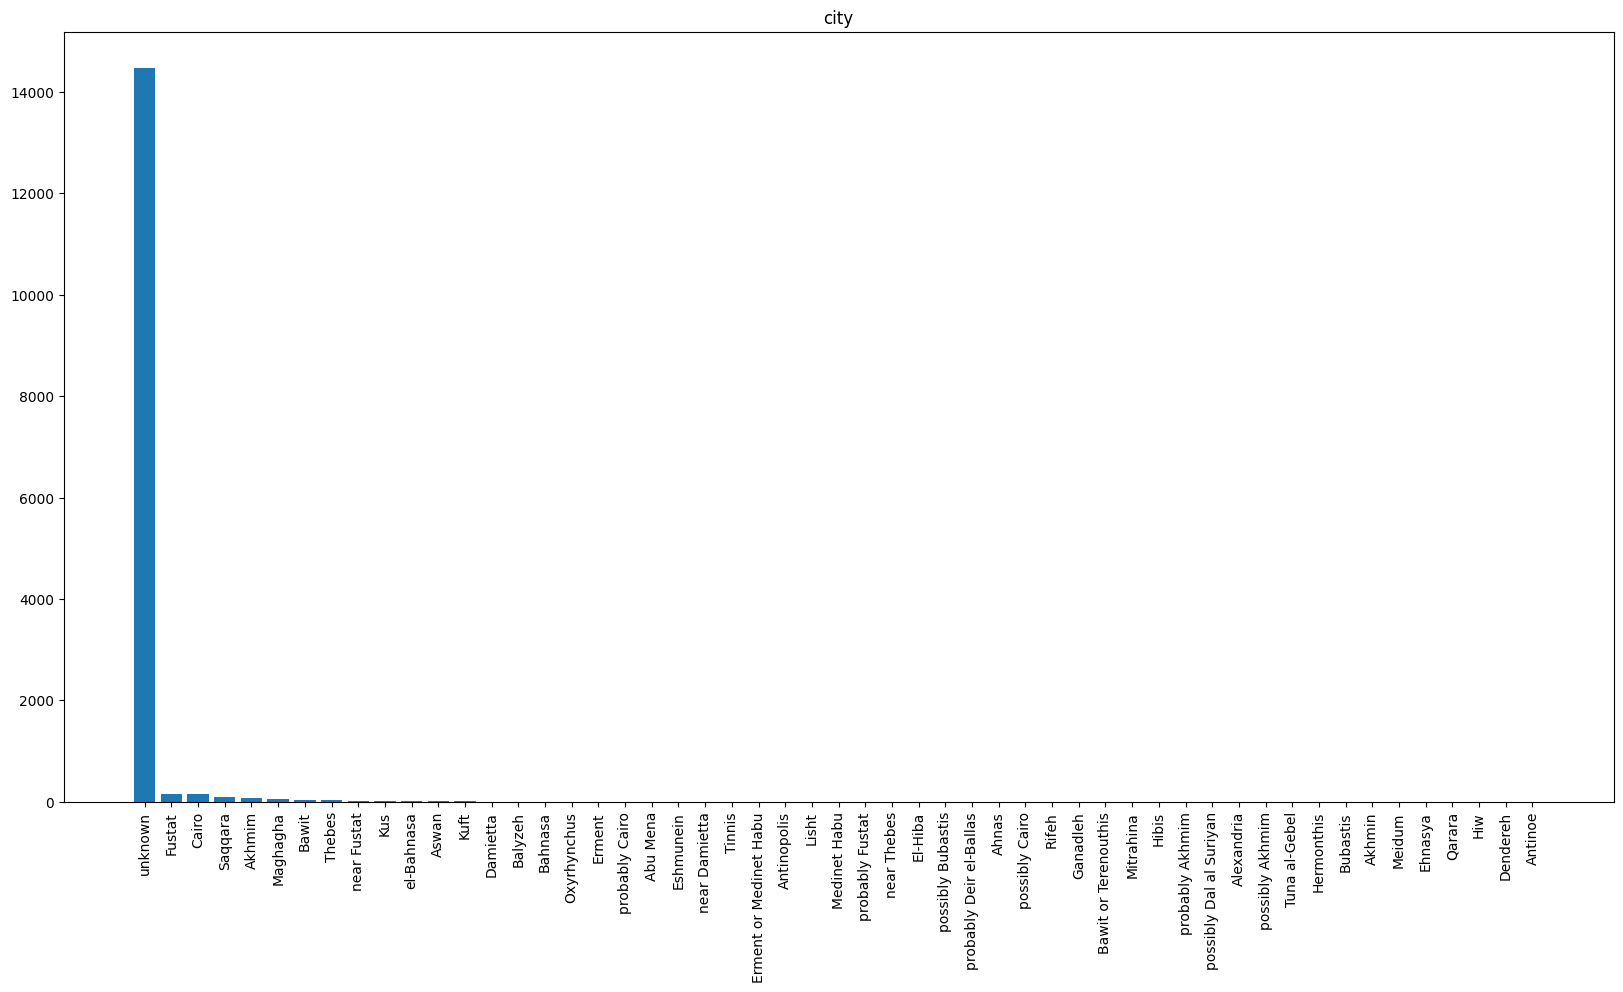

hi subregion


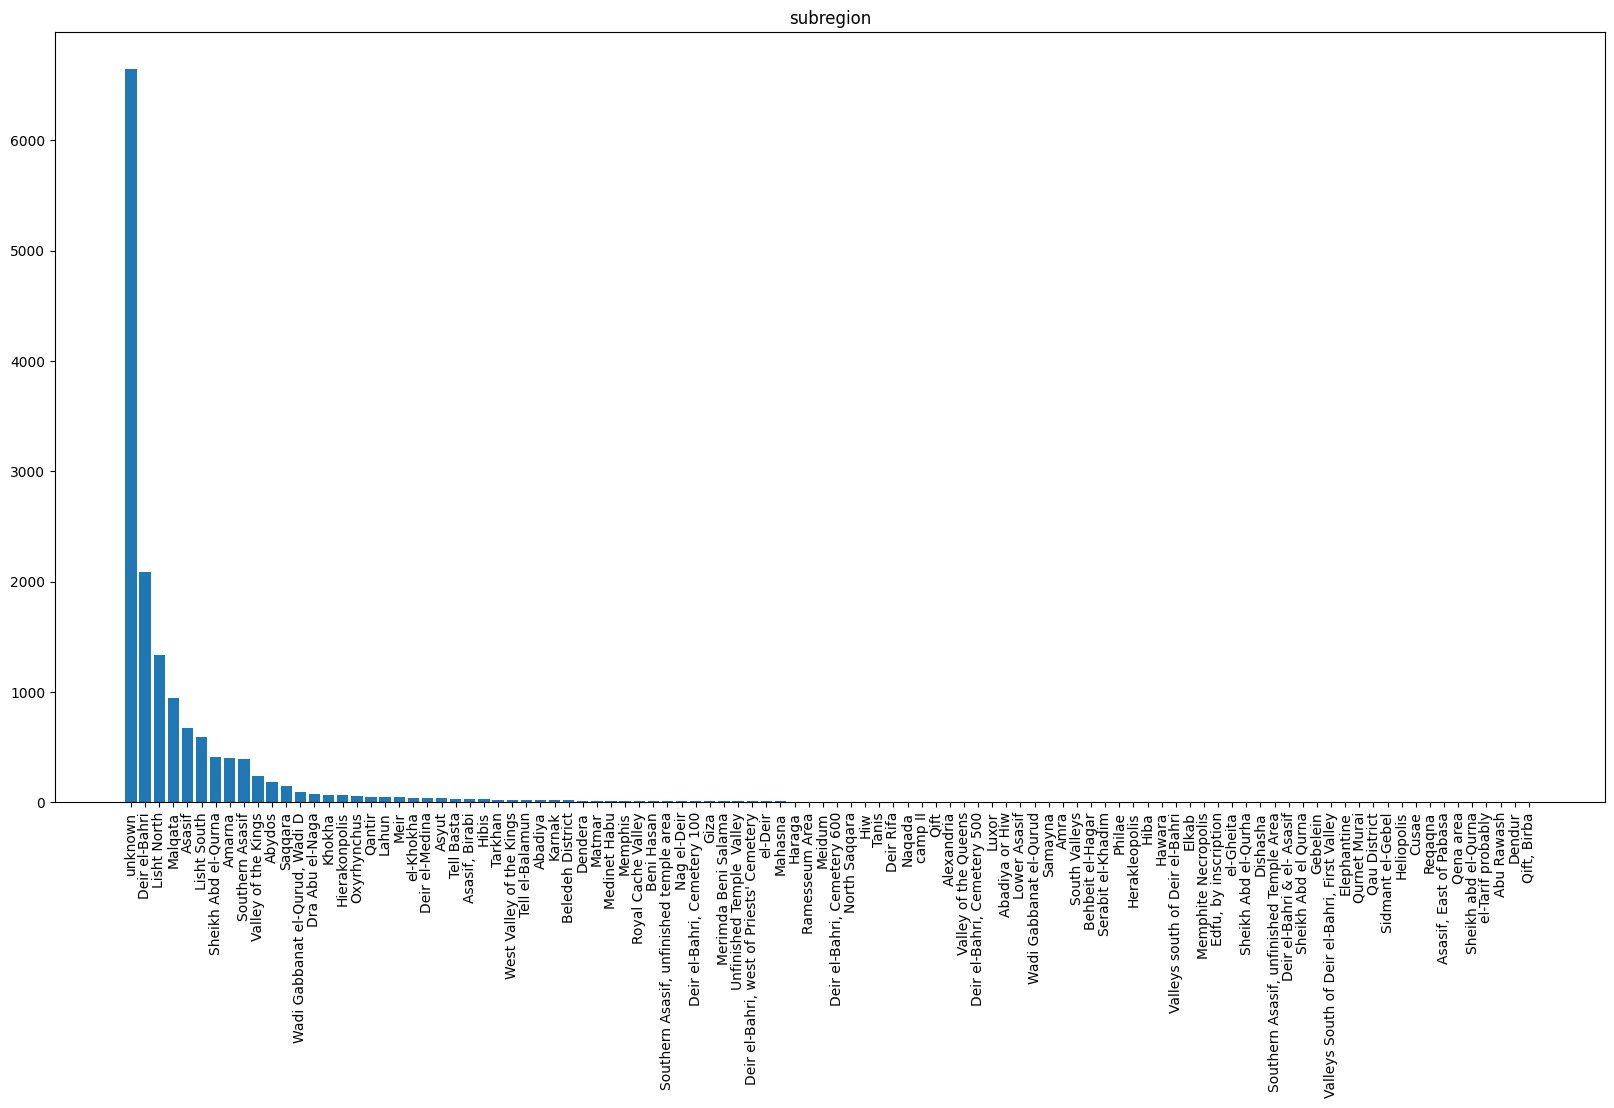

hi period


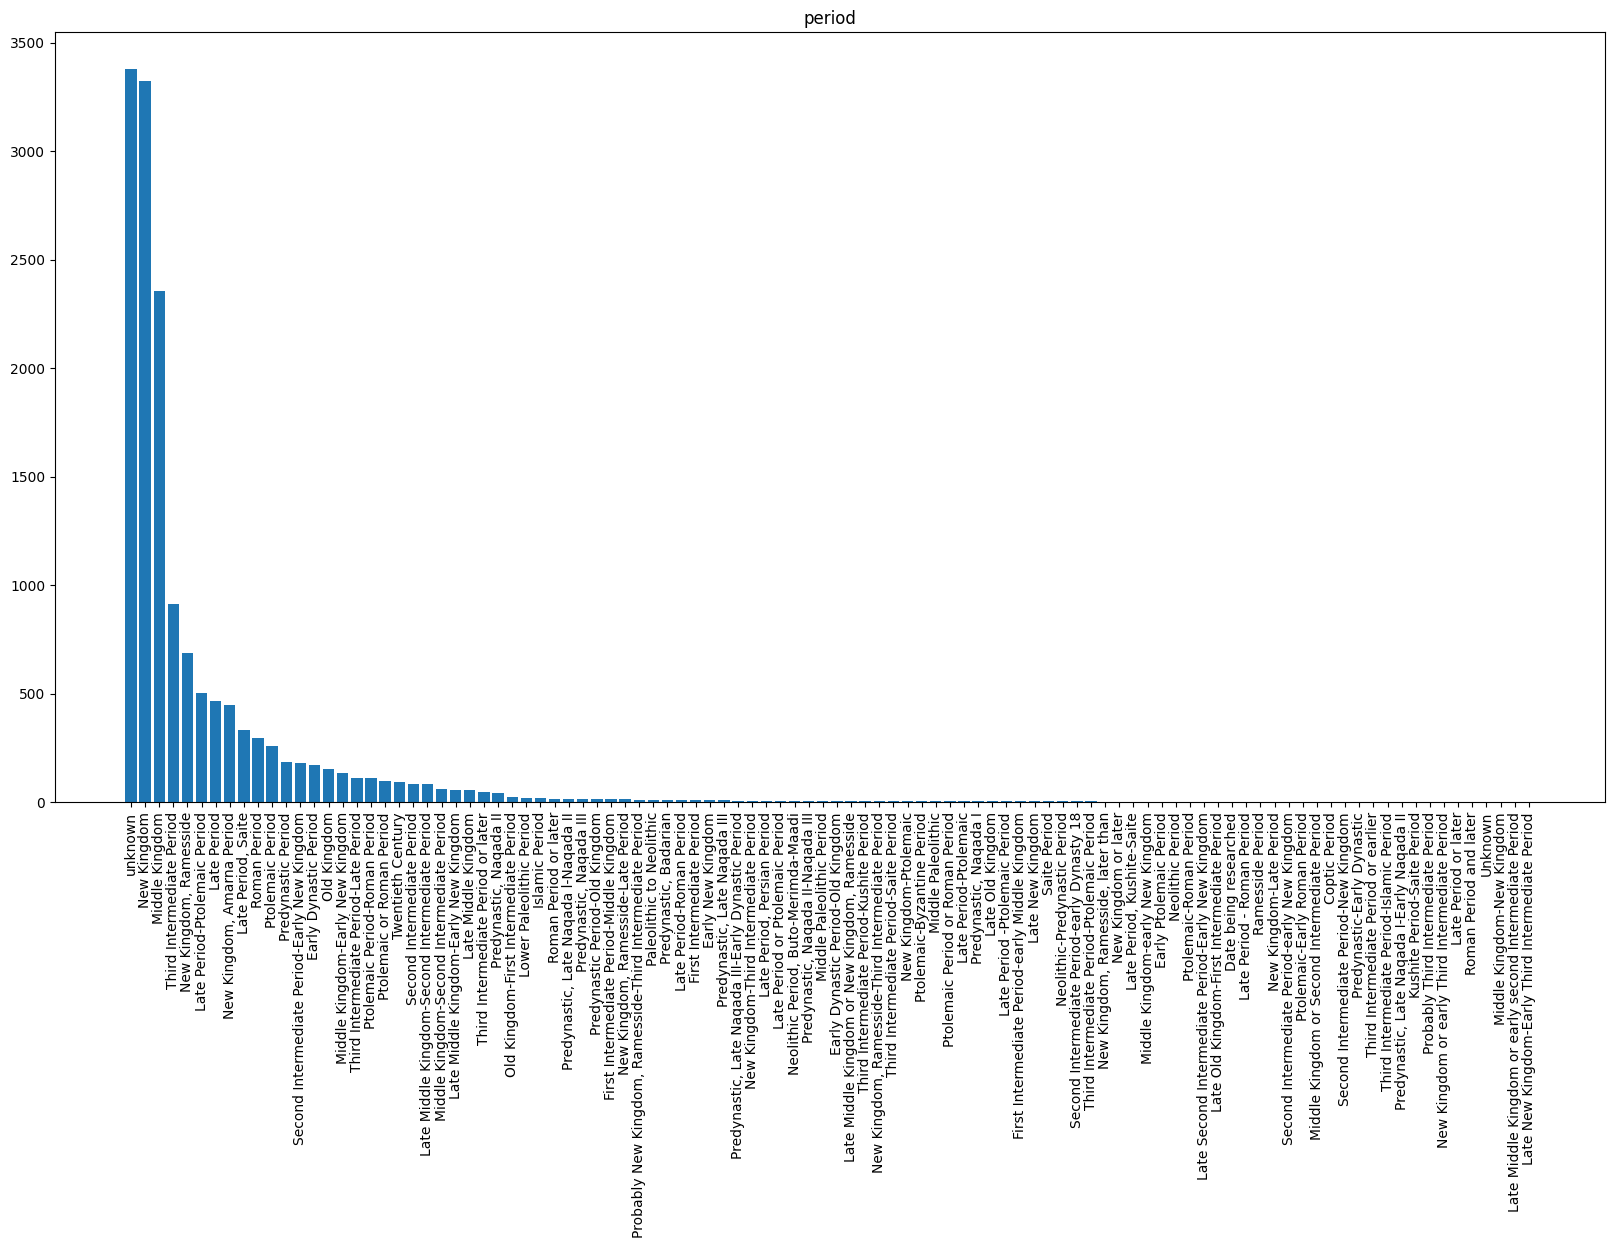

hi dynasty


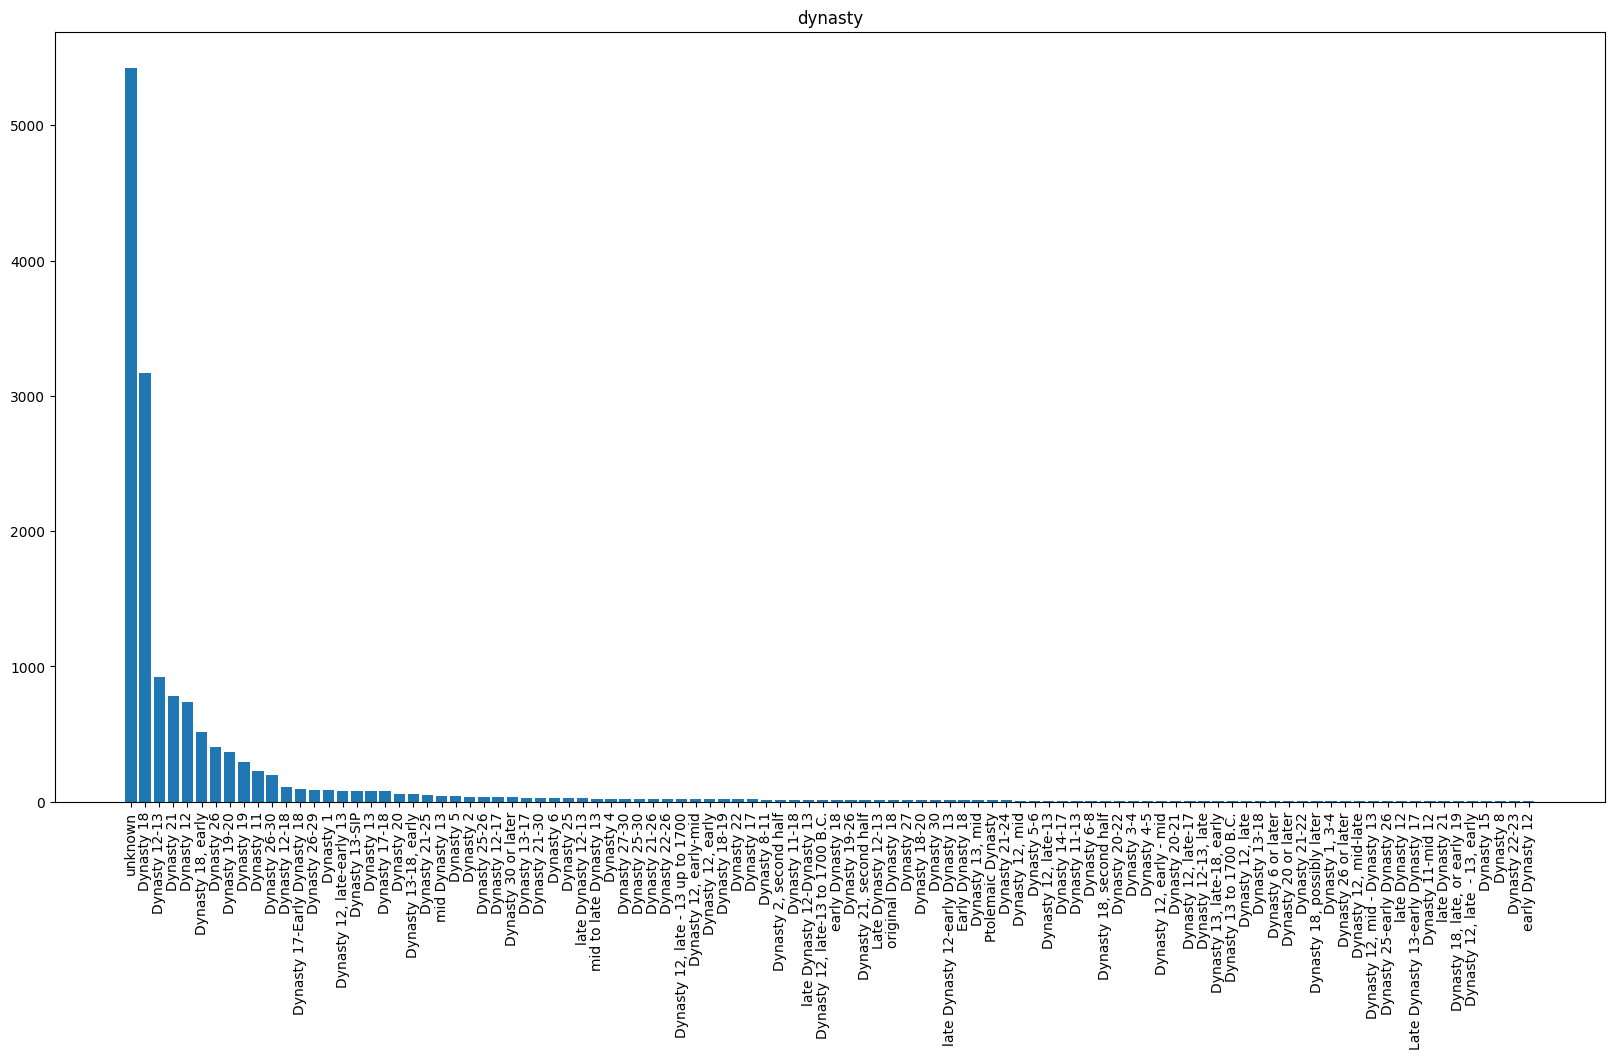

hi reign


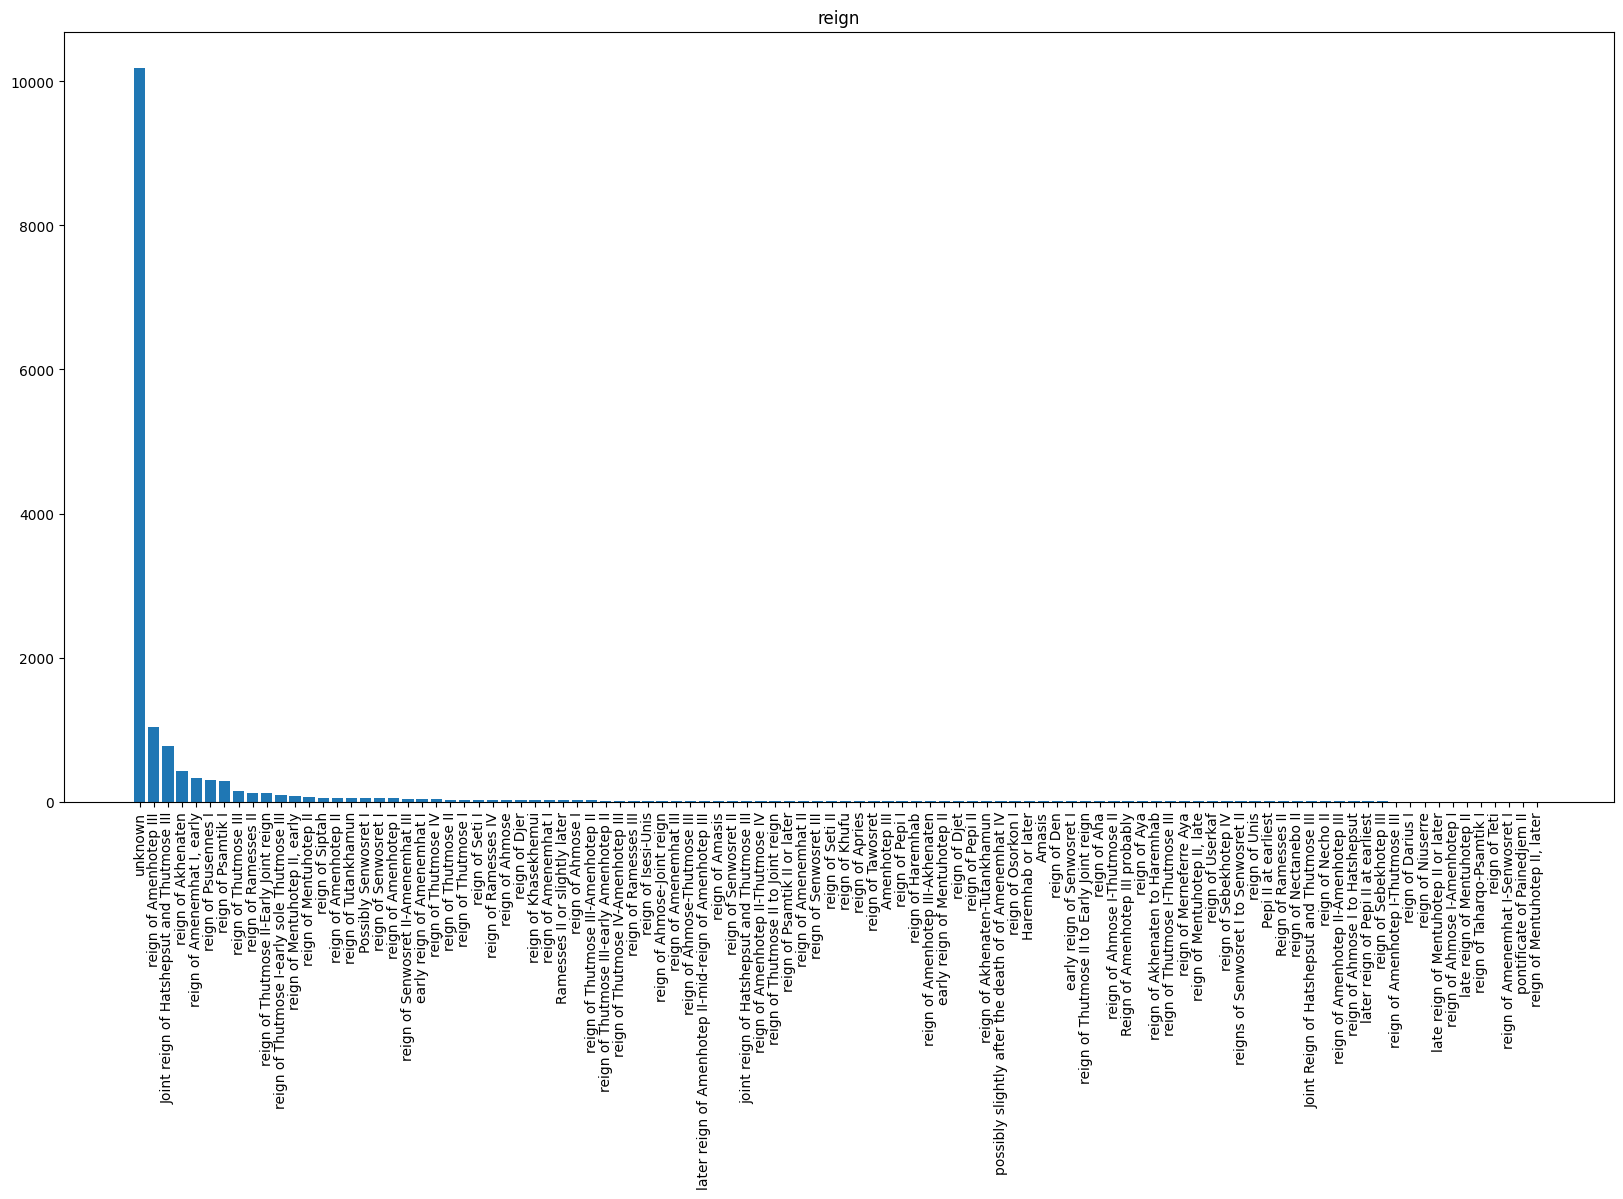

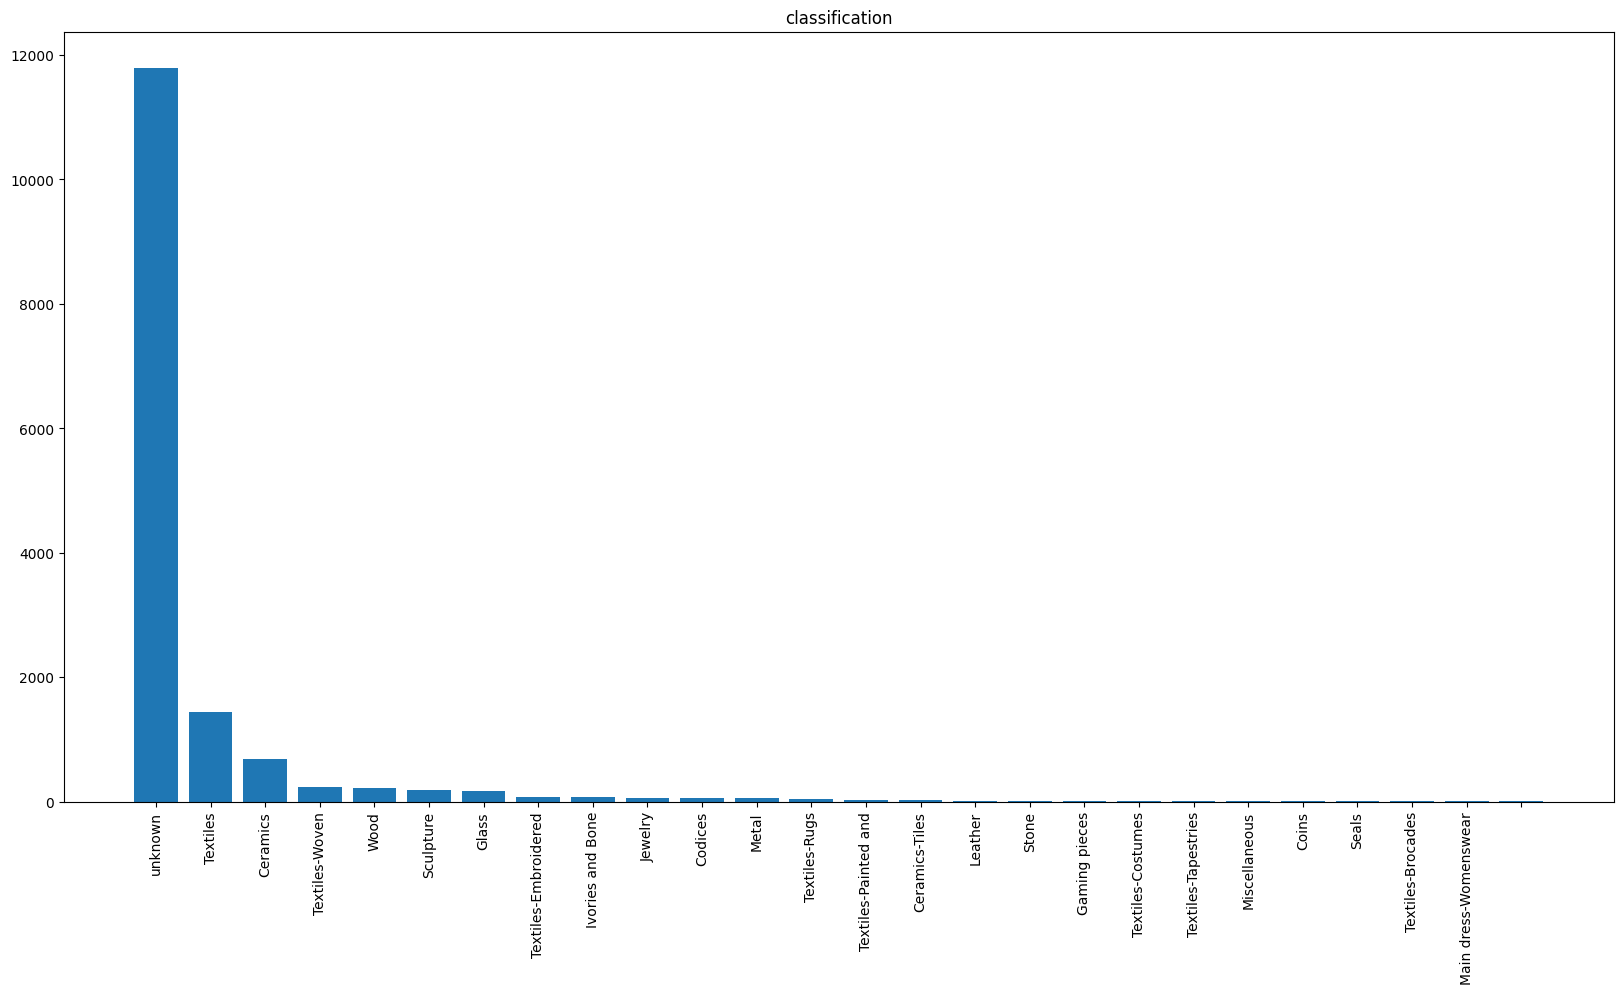

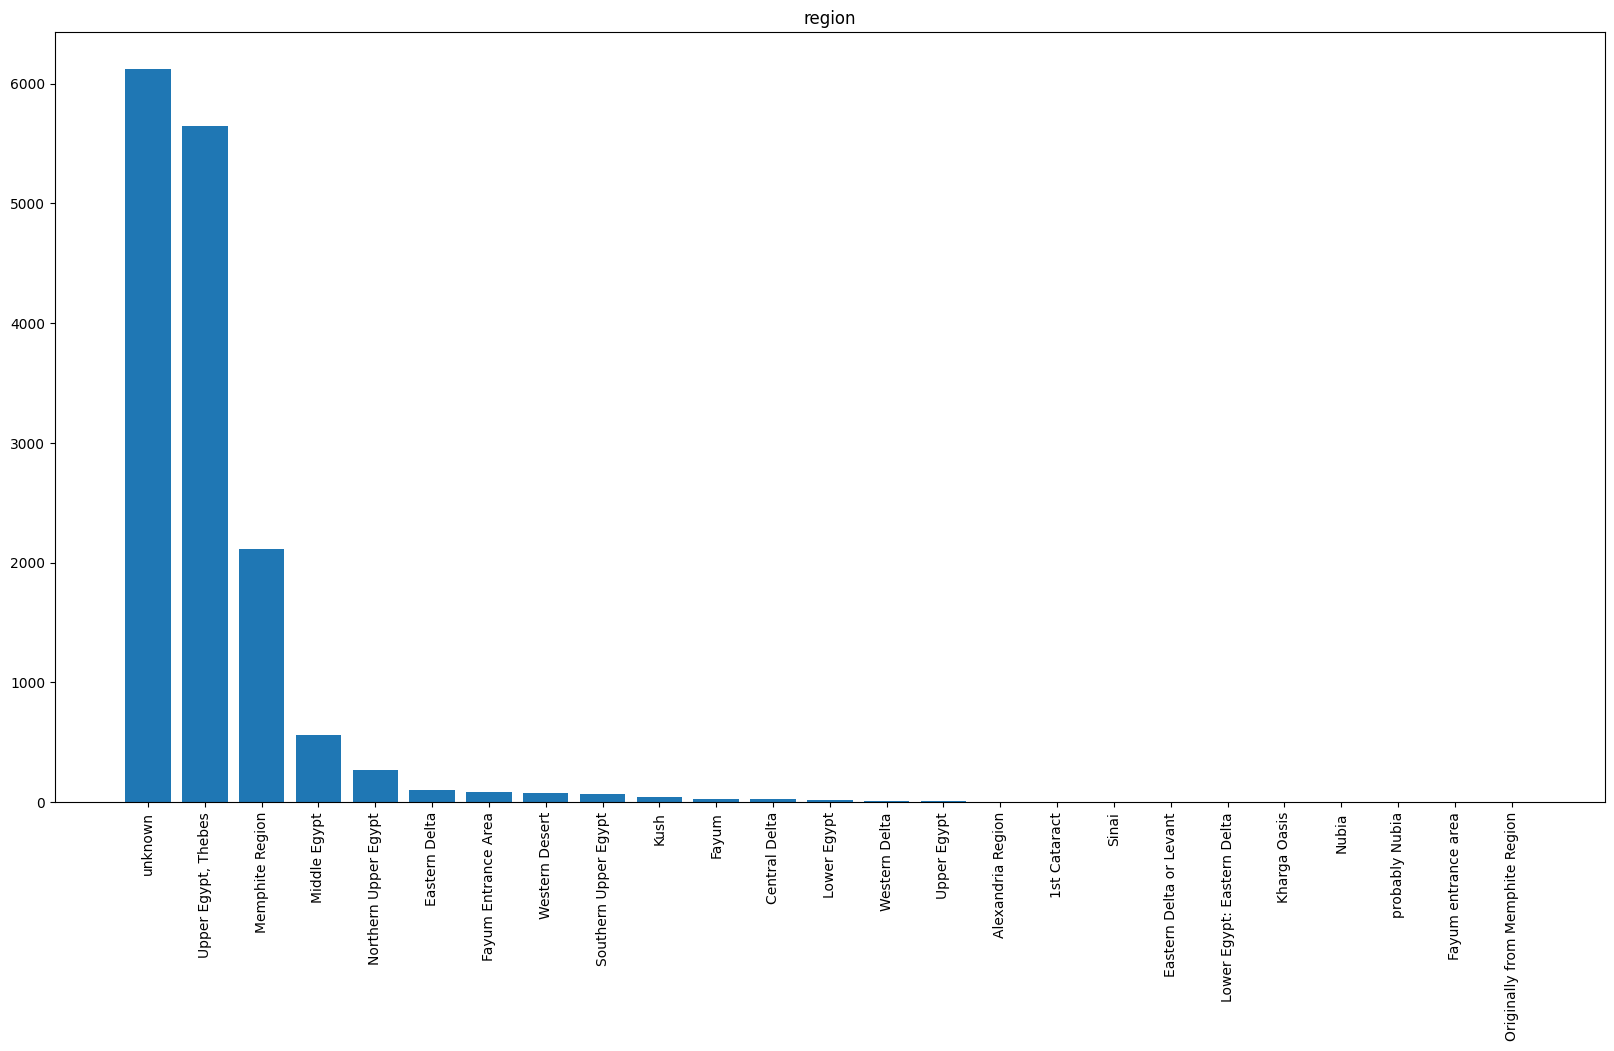

In [66]:
import matplotlib.pyplot as plt 
for i in list(df.columns):
    if len(df[i].value_counts()) <= 300:

        if len(df[i].value_counts()) >= 100:
            plt.figure(figsize=(20, 10))
            print("hi", i)
            plt.bar(df[i].value_counts().index[:100], df[i].value_counts()[:100])
            plt.xticks(rotation='vertical')
            plt.title(i)
            plt.show()
        else:
            plt.figure(figsize=(20, 10))
            plt.bar(df[i].value_counts().index, df[i].value_counts())
            plt.xticks(rotation='vertical')
            plt.title(i)
            plt.show()


In [67]:
df.to_csv("combined_Met.csv")


In [68]:
import pandas as pd
df_t = pd.read_csv("combined_Met.csv")
print(len(df_t))

15168
